In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('/content/concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isna().any()

Cement                False
Blast Furnace Slag    False
Fly Ash               False
Water                 False
Superplasticizer      False
Coarse Aggregate      False
Fine Aggregate        False
Age                   False
Strength              False
dtype: bool

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()

In [9]:
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(X_test)

In [11]:
r2_score(y_pred,y_test)

0.4231704797890976

In [12]:
model=LinearRegression()

np.mean(cross_val_score(model,X,y,scoring='r2'))

0.46099404916628606

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

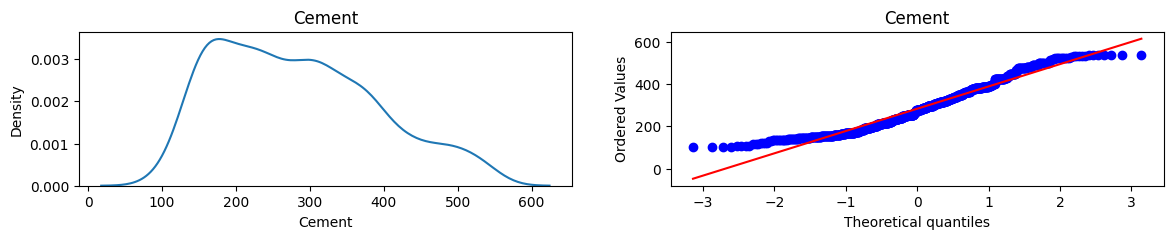

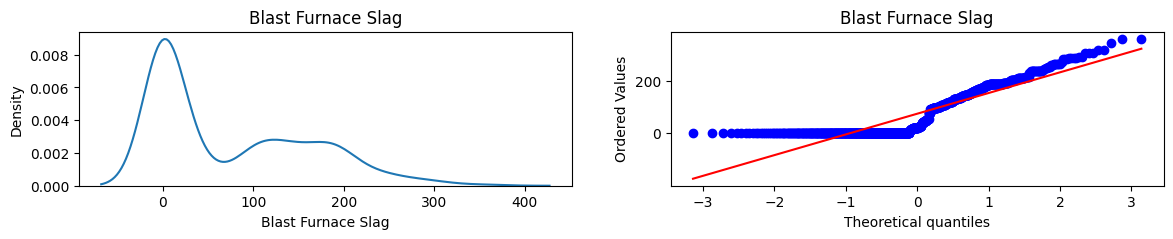

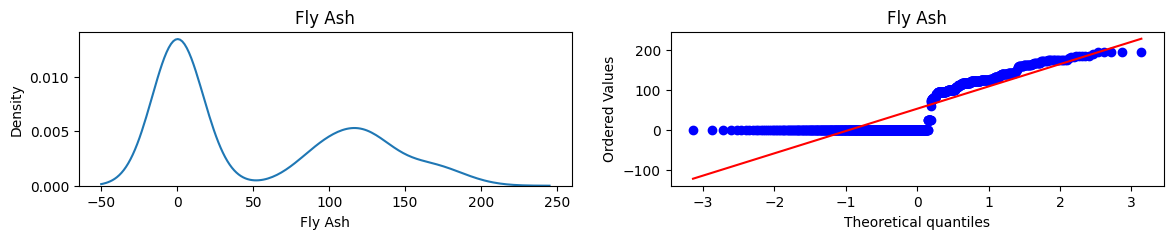

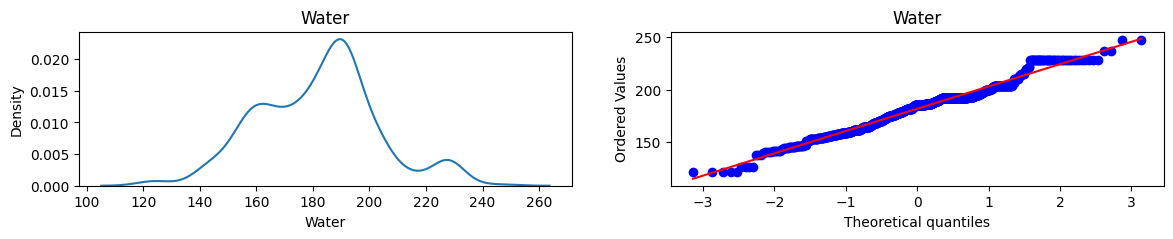

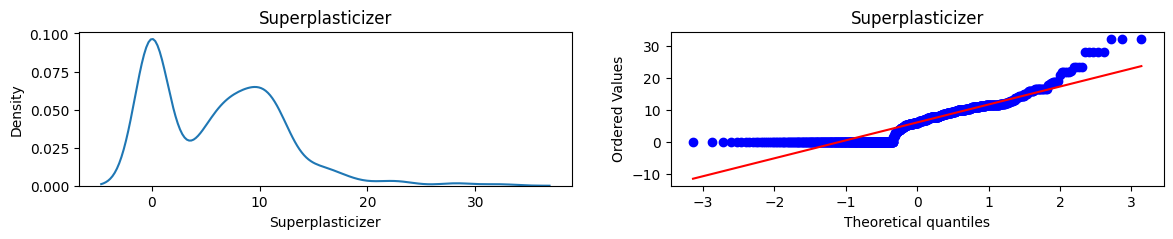

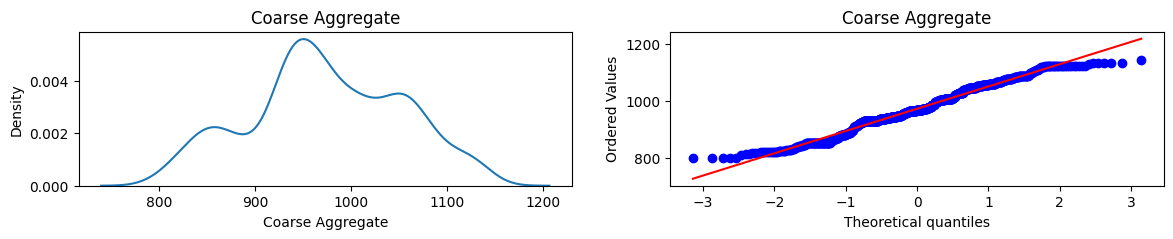

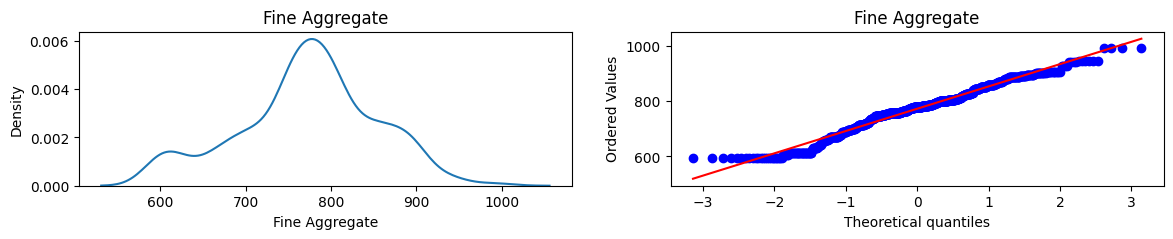

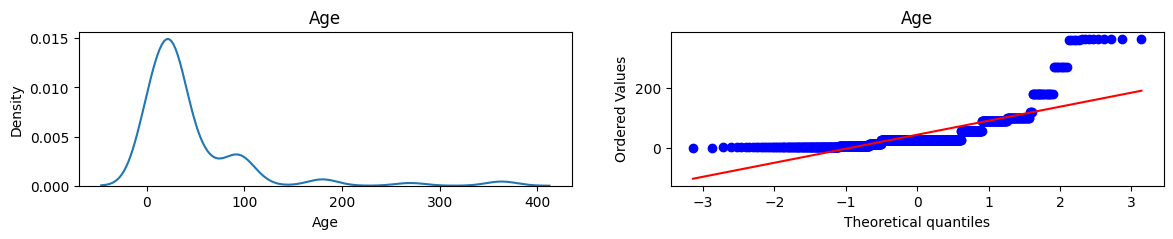

In [14]:
#Plotting distplot without transformation

for cols in X_train.columns:
  plt.figure(figsize=(14,2))

  plt.subplot(121)
  sns.kdeplot(X_train[cols])
  plt.title(cols)

  plt.subplot(122)
  stats.probplot(X_train[cols],plot=plt,dist="norm")
  plt.title(cols)

In [15]:

#Applying Box-Cox transformer

trf=PowerTransformer(method='box-cox')

X_train_trans=trf.fit_transform(X_train+0.0001)

X_test_trans=trf.transform(X_test+0.0001)

pd.DataFrame({'cols':X_train.columns,'box-cox lambda':trf.lambdas_})

,cols,box-cox lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.031051
2,Fly Ash,-0.052019
3,Water,0.772681
4,Superplasticizer,0.133968
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066626


In [16]:
model=LinearRegression()

model.fit(X_train_trans,y_train)

y_pred=model.predict(X_test_trans)

r2_score(y_pred,y_test)

0.7642929075785058

In [17]:
#Using cross val

model=LinearRegression()

trf=PowerTransformer(method='box-cox')

X_transformed=trf.fit_transform(X+0.0001)

np.mean(cross_val_score(model,X_transformed,y,scoring='r2'))

0.6675752260319554

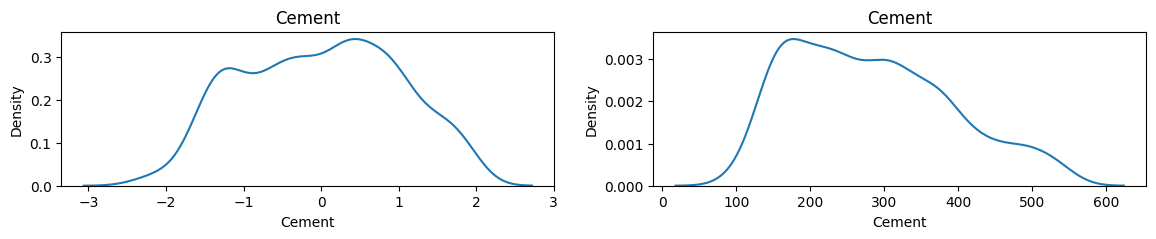

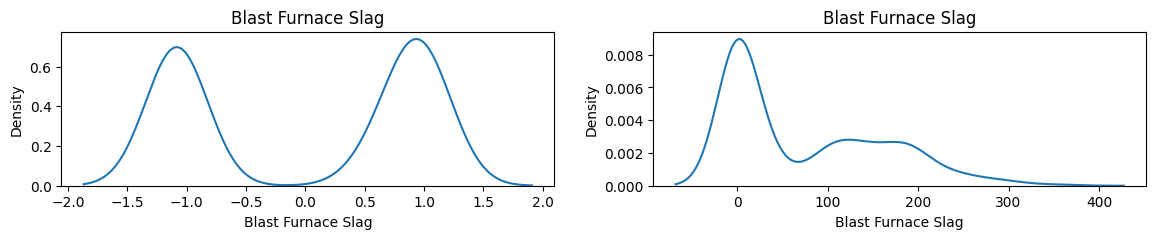

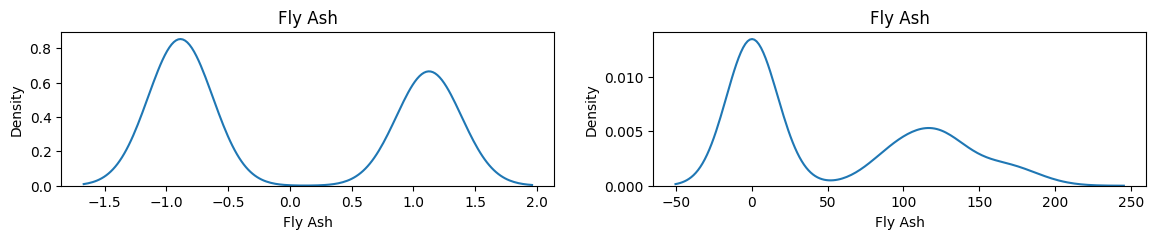

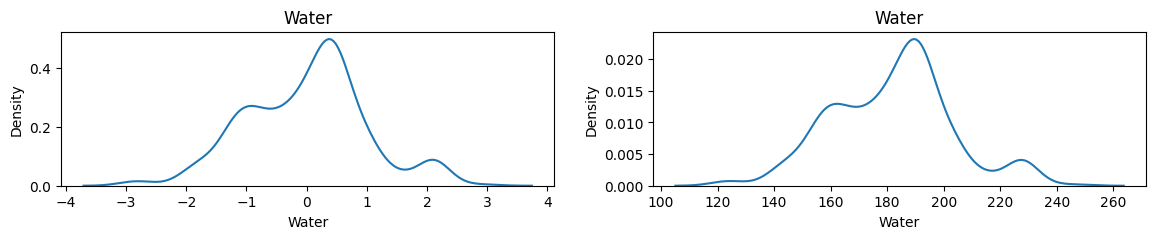

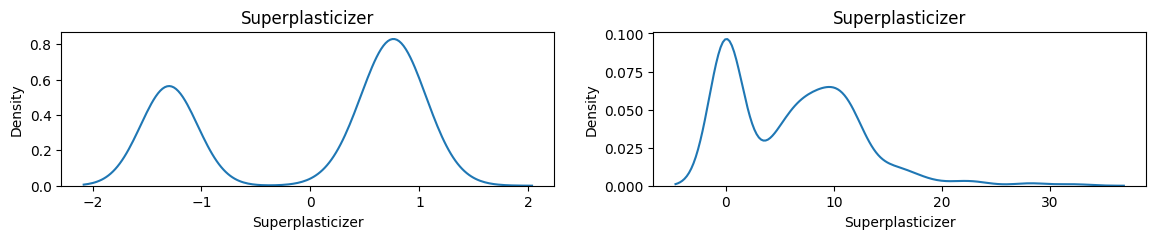

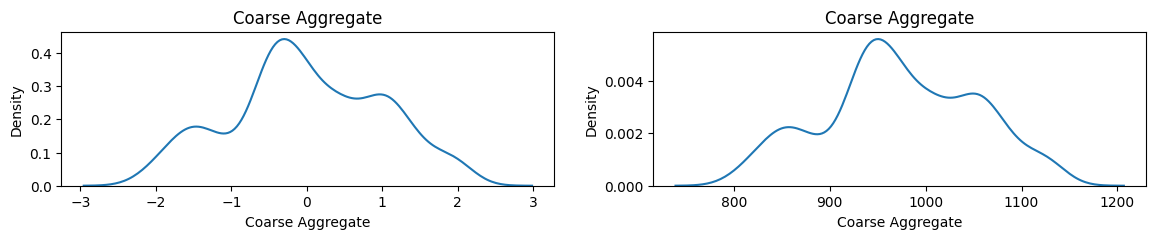

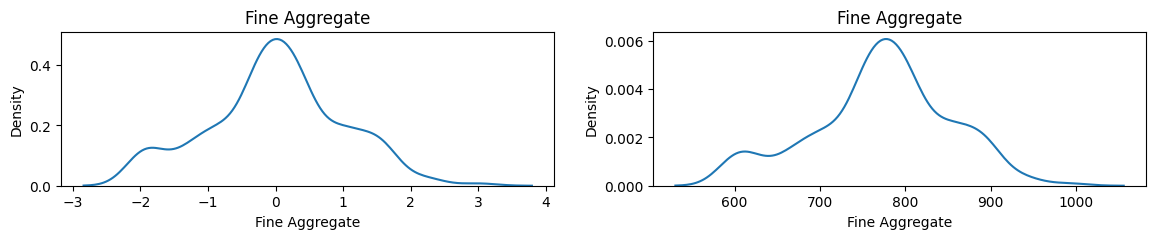

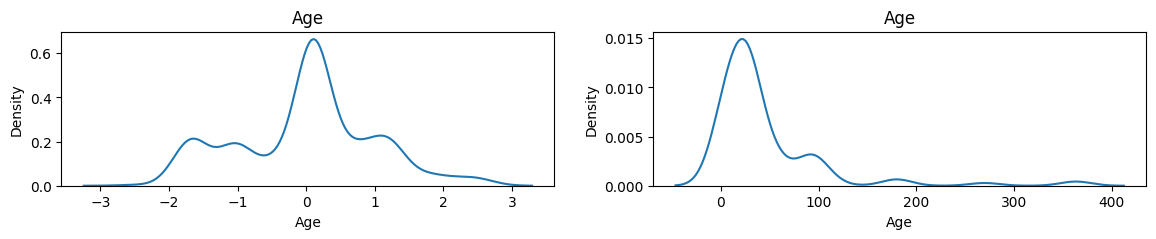

In [18]:
#Before anf after box cox distribution

X_train_trans=pd.DataFrame(X_train_trans,columns=X_train.columns)

for cols in X_train.columns:
  plt.figure(figsize=(14,2))

  plt.subplot(122)
  sns.kdeplot(X_train[cols])
  plt.title(cols)

  plt.subplot(121)
  sns.kdeplot(X_train_trans[cols])
  plt.title(cols)

Text(0.5, 1.0, 'After applying Box Cox Trf')

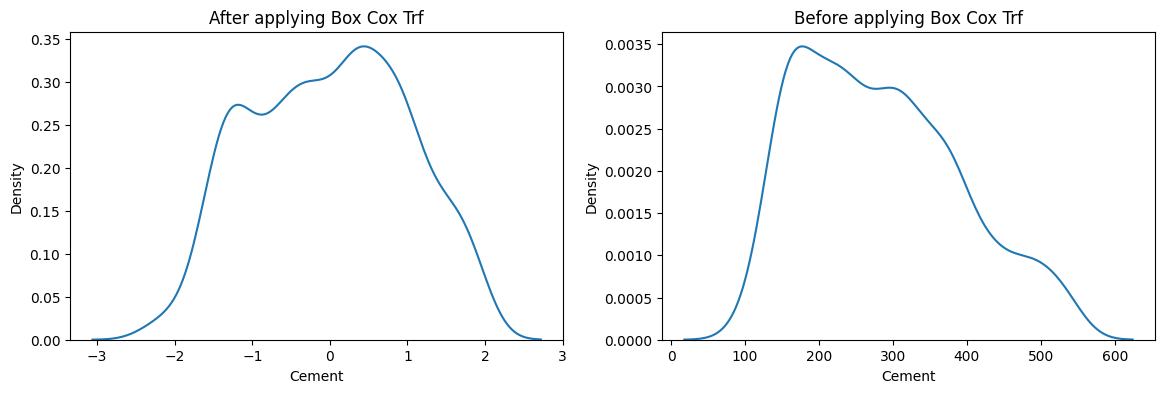

In [23]:
#Before anf after box cox distribution

X_train_trans=pd.DataFrame(X_train_trans,columns=X_train.columns)

plt.figure(figsize=(14,4))

plt.subplot(122)
sns.kdeplot(X_train['Cement'])
plt.title('Before applying Box Cox Trf')

plt.subplot(121)
sns.kdeplot(X_train_trans['Cement'])
plt.title('After applying Box Cox Trf')

In [ ]:
#Applying Joe Johnsom

trf2=PowerTransformer()

X_train_trans=trf2.fit_transform(X_train)
X_test_trans=trf2.fit_transform(X_test)

model=LinearRegression()

model.fit(X_train_trans,y_train)

y_pred=model.predict(X_test_trans)

print(r2_score(y_pred,y_test))


0.791273699149832


In [ ]:
#Using cross val

model=LinearRegression()

trf=PowerTransformer()

X_transformed=trf.fit_transform(X+0.0001)

np.mean(cross_val_score(model,X_transformed,y,scoring='r2'))

0.6834632073102617

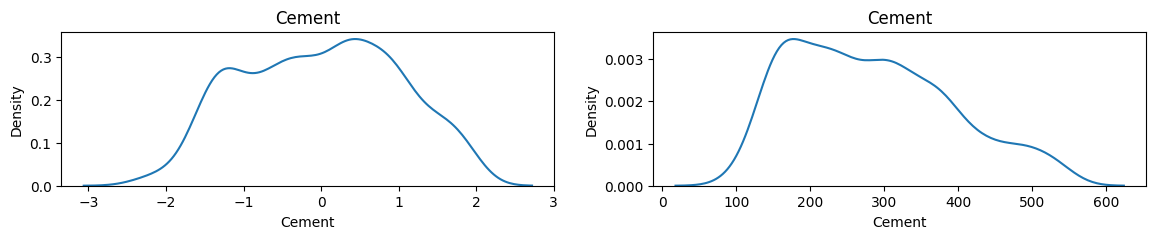

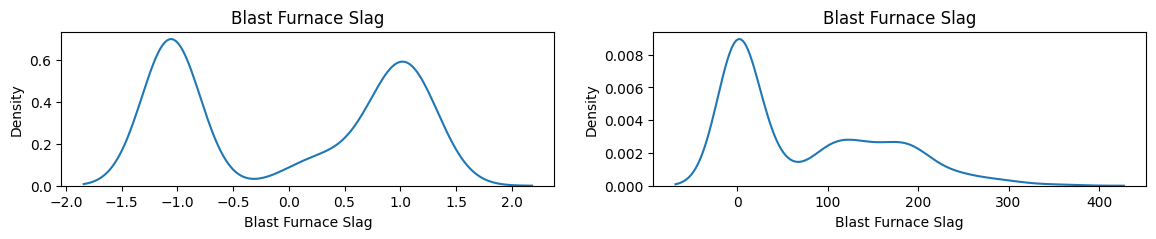

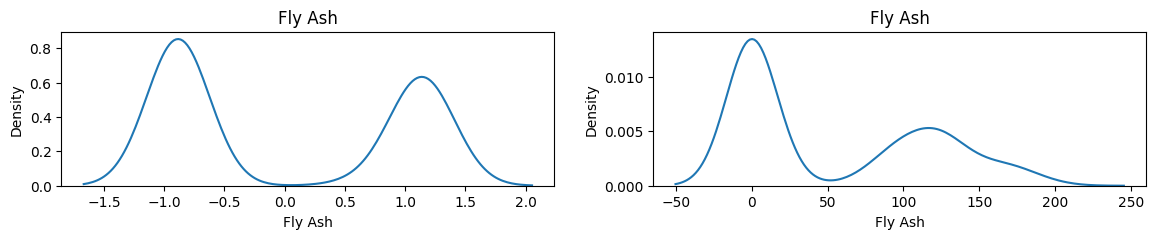

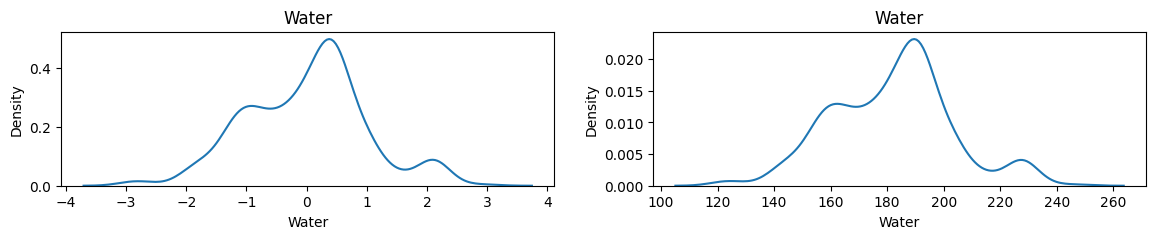

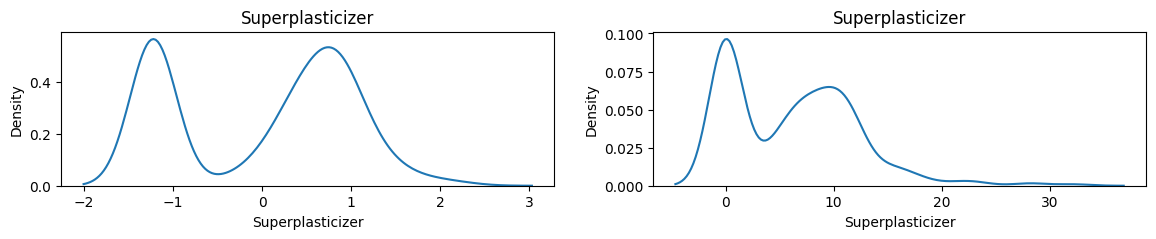

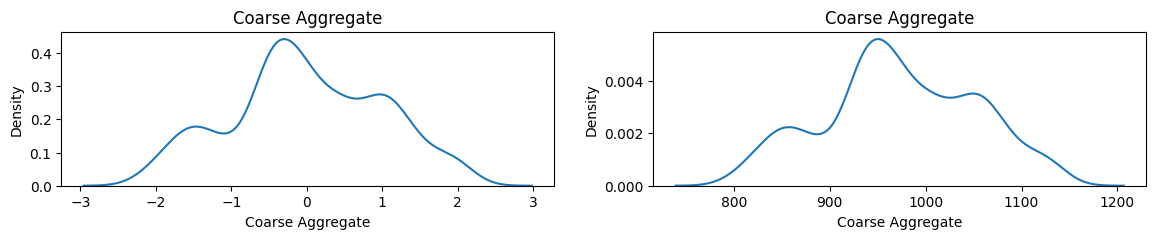

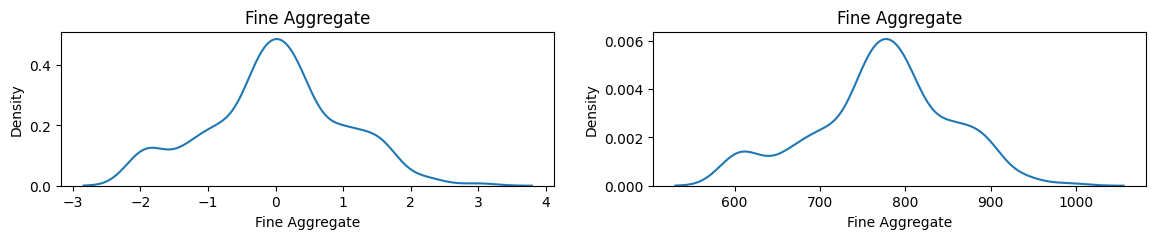

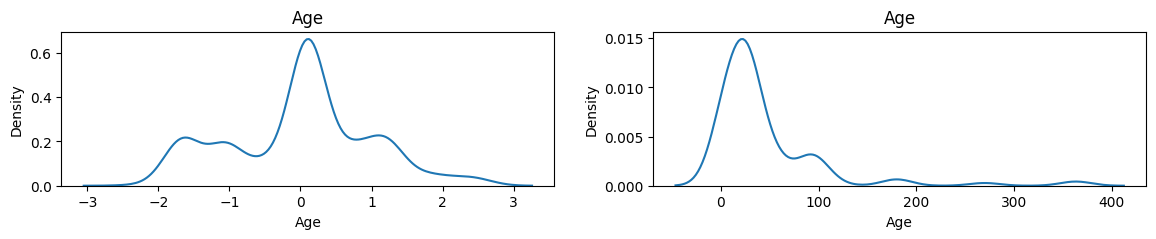

In [ ]:
#Before anf after Yeo johnson distribution

X_train_trans=pd.DataFrame(X_train_trans,columns=X_train.columns)

for cols in X_train.columns:
  plt.figure(figsize=(14,2))

  plt.subplot(122)
  sns.kdeplot(X_train[cols])
  plt.title(cols)

  plt.subplot(121)
  sns.kdeplot(X_train_trans[cols])
  plt.title(cols)